# Predicting Restaurant Food Cost 


Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

Size of training set: 12,690 records

Size of test set: 4,231 records



Size of training set: 12,690 records

Size of test set: 4,231 records

FEATURES:
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

# Importing required libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

# Importing the train and test dataset

In [134]:
data_train = pd.read_excel('Data_Train.xlsx')
data_test = pd.read_excel('Data_Test.xlsx')

In [135]:
data_train.head(100)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
95,CAFÉ,9952,"Cafe, Healthy Food","12:30pm – 3:30pm, 6pm – 10:30pm (Mon-Sun)",Hyderabad,Lingampally,4.2,148 votes,500
96,CASUAL DINING,10884,"Fast Food, Mexican, North Indian, Chinese",11am – 11pm (Mon-Sun),Chennai,Nanganallur,3.8,221 votes,700
97,CASUAL DINING,1177,"North Indian, Iranian",12noon – 10:30pm (Mon-Sun),Bangalore,Church Street,3.9,228 votes,950
98,QUICK BITES,3055,"Biryani, Kebab","Closed (Mon),11am – 10:30pm (Tue-Sun)",Bangalore,Rajajinagar,3.8,302 votes,400


In [136]:
data_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [137]:
data_train.shape,data_test.shape

((12690, 9), (4231, 8))

In [138]:
print('Number of  type restaurant ',data_train['TITLE'].nunique())
print('Number of unique cuisines ',data_train['CUISINES'].nunique())

Number of  type restaurant  113
Number of unique cuisines  4155


In [139]:
data_train["Type"] = "train"
data_test["Type"] = "test"

# Merging the Train and Test dataset

In [140]:
df = pd.concat([data_train,data_test],axis=0,sort=False)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
TITLE            16921 non-null object
RESTAURANT_ID    16921 non-null int64
CUISINES         16921 non-null object
TIME             16921 non-null object
CITY             16774 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
VOTES            15315 non-null object
COST             12690 non-null float64
Type             16921 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [142]:
df.shape

(16921, 10)

# Checking the duplicate records

In [143]:
df.duplicated().sum()

26

In [144]:
data= df.drop_duplicates()

In [145]:
data.shape

(16895, 10)

# Null Value analysis

In [146]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
Type                0
dtype: int64

>Concatenating the City and Locality 

In [147]:
import warnings
warnings.filterwarnings("ignore")
data['Place']=data['CITY']+' '+data['LOCALITY']
data.drop(columns=['CITY','LOCALITY'],inplace=True)

In [148]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
RATING              4
VOTES            1602
COST             4230
Type                0
Place             148
dtype: int64

# Treating the Null/Missing values

In [149]:
data['RATING'].fillna(data['RATING'].mode().values[0],inplace=True)
data['Place'].fillna(data['Place'].mode().values[0],inplace=True)


> Converting Votes into int

In [150]:
data['VOTES']=data['VOTES'].str.extract('(\d+)').astype(float)

In [151]:
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Type,Place
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49.0,1200.0,train,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30.0,1500.0,train,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221.0,800.0,train,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24.0,800.0,train,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165.0,300.0,train,Mumbai Lower Parel


>Treating Null/missing values for the votes feature

In [152]:
data['VOTES'].fillna(data['VOTES'].mean(),inplace=True)

In [153]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
RATING              0
VOTES               0
COST             4230
Type                0
Place               0
dtype: int64

In [154]:
data.drop(columns=['RESTAURANT_ID','TIME'],inplace=True)

In [155]:
data.head()

,TITLE,CUISINES,RATING,VOTES,COST,Type,Place
0,CASUAL DINING,"Malwani, Goan, North Indian",3.6,49.0,1200.0,train,Thane Dombivali East
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",4.2,30.0,1500.0,train,Chennai Ramapuram
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",3.8,221.0,800.0,train,Chennai Saligramam
3,QUICK BITES,"Tibetan, Chinese",4.1,24.0,800.0,train,Mumbai Bandra West
4,DESSERT PARLOR,Desserts,3.8,165.0,300.0,train,Mumbai Lower Parel


# Encoding the categorical features using LabelEncoder

In [156]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['CUISINES','TITLE','Place']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [157]:
data.head()

,TITLE,CUISINES,RATING,VOTES,COST,Type,Place
0,34,3294,3.6,49.0,1200.0,train,1868
1,36,364,4.2,30.0,1500.0,train,455
2,34,3729,3.8,221.0,800.0,train,460
3,104,5156,4.1,24.0,800.0,train,1235
4,55,2218,3.8,165.0,300.0,train,1299


# Mapping the Rating values to Zero One

In [158]:
def partition(x):
    if x < '3':
        return 0
    return 1
actualScore = data['RATING']
ZeroOne = actualScore.map(partition) 
data['RATING'] = ZeroOne

In [159]:
data_train=data[data['Type']=='train']
data_test=data[data['Type']=='test']

In [160]:
data_train.head()

,TITLE,CUISINES,RATING,VOTES,COST,Type,Place
0,34,3294,1,49.0,1200.0,train,1868
1,36,364,1,30.0,1500.0,train,455
2,34,3729,1,221.0,800.0,train,460
3,104,5156,1,24.0,800.0,train,1235
4,55,2218,1,165.0,300.0,train,1299


In [161]:
data_train.drop(['Type'],axis=1,inplace=True)

In [162]:
data_test.drop(['Type'],axis=1,inplace=True)

In [163]:
data_train.head()

,TITLE,CUISINES,RATING,VOTES,COST,Place
0,34,3294,1,49.0,1200.0,1868
1,36,364,1,30.0,1500.0,455
2,34,3729,1,221.0,800.0,460
3,104,5156,1,24.0,800.0,1235
4,55,2218,1,165.0,300.0,1299


In [164]:
data_test.head()

,TITLE,CUISINES,RATING,VOTES,COST,Place
0,34,3878,1,564.0,NaN,1695
1,104,4879,1,61.0,NaN,1277
2,34,4333,1,350.0,NaN,1312
3,95,631,1,1445.0,NaN,590
4,104,4891,1,23.0,NaN,1085


# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

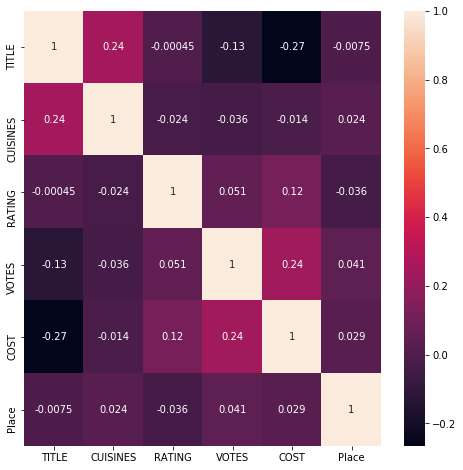

In [165]:
df_cor=data_train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_cor , annot =True)

# Handling Skewness

In [166]:
data_train.skew()

TITLE       -0.069688
CUISINES    -0.219931
RATING      -3.038879
VOTES       14.883791
COST         3.978358
Place        0.128200
dtype: float64

In [168]:
for col in data_train.columns:
    if data_train.skew().loc[col]>0.55:
        data_train[col]=np.log1p(data_train[col])


In [169]:
data_train.skew()

TITLE      -0.069688
CUISINES   -0.219931
RATING     -3.038879
VOTES      -0.163720
COST        0.397407
Place       0.128200
dtype: float64

# Data Visualisation using LinePlot

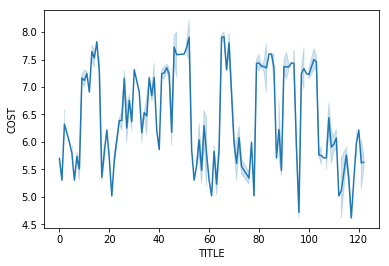

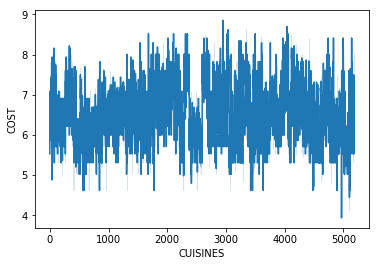

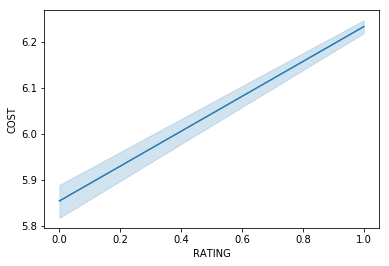

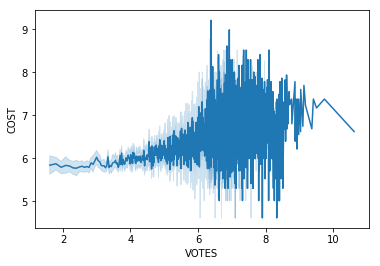

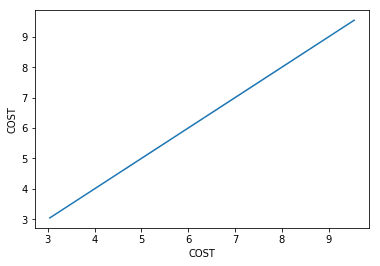

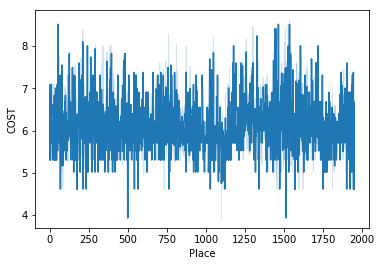

In [119]:
attr=list(data_train.columns)
plt.figure()
for val in attr:
    sns.lineplot(x=val,y='COST',data=data_train)
    plt.show()

# Handling OutLiers

In [170]:
from  scipy.stats import zscore
zs=np.abs(zscore(data_train))
zs

array([[0.86704102, 0.32704396, 0.29957234, 0.92427664, 1.23330021,
        1.92925862],
       [0.81124528, 1.61253523, 0.29957234, 1.27291627, 1.54249565,
        0.76326555],
       [0.86704102, 0.61500196, 0.29957234, 0.16288292, 0.67163125,
        0.75373786],
       ...,
       [0.38836297, 0.12111137, 0.29957234, 0.89886651, 1.34420418,
        1.05842808],
       [0.86704102, 1.05918545, 0.29957234, 1.22731911, 0.28780478,
        0.8833144 ],
       [0.86704102, 0.58918504, 0.29957234, 0.97714339, 0.2732882 ,
        0.10375391]])

In [171]:
df=data_train[(zs<3).all(axis=1)]

In [172]:
print('shape of the data with outliers  ' ,data_train.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (12665, 6)
shape of the data without  outliers   (11567, 6)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is  (11567, 6) . Now this will be our finalised Dataset for modelling.

# Separating the input/output variables

In [173]:
y=data_train['COST']
x=data_train.drop(['COST'],axis=1)

# Applying Various Regression Models
In this section we will be applying several regressor models and hence we will be checking following performance matrix :

1) R2 score

2) Root mean sqaure Error

3) Mean of crossing validation score using R2 as scoring

4) Std Deviation of crossing validation score using R2 as scoring

We have also used GridSearch for tuning the parameters

In [174]:
#importing the libraries
from sklearn.model_selection import train_test_split
from  sklearn.metrics import r2_score

# Function for R2 Score
This function is built to find the best r2 score depending on the random state while splitting the model. This function prints the best r2 score and returns the random state for that R2 score

In [175]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score reached is {} at random state {}' .format(max_r2_score,Final_r_state))

# Function for RMSE
This function finds the rmse of the model using the random state at best r2 score

In [176]:
from sklearn.model_selection import cross_val_score
def rmse(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    rmse=cross_val_score(model,x,y,cv=10,scoring='neg_mean_squared_error').mean()
    print('mean cross_val_score using RMSE as a scoring parameter',rmse)
    return rmse

Below function is created to make a list of rmse generated by different regressor , so that it can be compared at last, for the selection of the best model

In [177]:
rmse_list=[]
def list_rmse(RMSE):
    rmse_list.append(RMSE)
    return rmse_list

# 1.Linear Regression

In [178]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Final_r_state=max_r2_score(lreg,x,y)

The maximum r2 score reached is 0.2804101098724585 at random state 99


In [179]:
from sklearn.model_selection import cross_val_score
print('mean cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())

mean cross_val_score 0.2654211955065583
std deviation of cross_val_score 0.011194365685905646


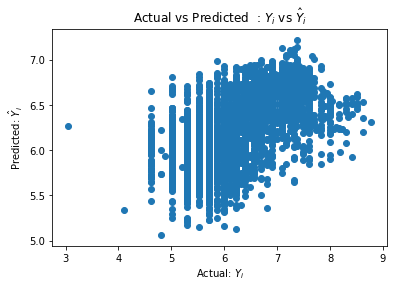

In [189]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=99)
Y_pred = lreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

# 2.Lasso Regression

In [181]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameter={"alpha":[0.001,0.01,0.1,1]}
gs=GridSearchCV(lsreg,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 0.001}

In [182]:
lsreg=Lasso(alpha=0.001)
Final_r_state=max_r2_score(lsreg,x,y)

The maximum r2 score reached is 0.28002079597928486 at random state 99


In [183]:
print('mean cross_val_score using R2 as parameter',cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
RMSE=rmse(lsreg,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.2653958424090004
std deviation of cross_val_score using  R2 as parameter 0.011160368715703892
mean cross_val_score using RMSE as a scoring parameter -0.3818615647434645


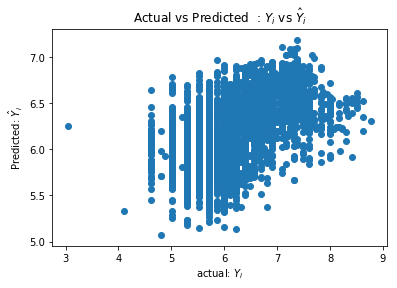

In [188]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=99)
Y_pred = lsreg.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

# 3.KNeighborsRegressor

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gs=GridSearchCV(knr,neighbors,cv=10)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 5}

In [186]:
knr=KNeighborsRegressor(n_neighbors=5)
Final_r_state=max_r2_score(knr,x,y)

The maximum r2 score reached is 0.47212751795517205 at random state 100


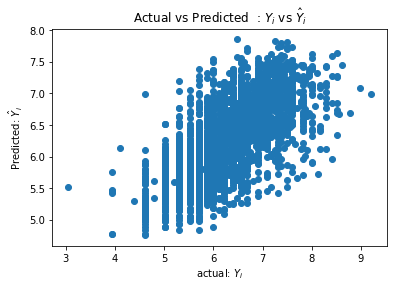

In [187]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=100)
Y_pred = knr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

# 4.DecisionTreeRegressor

In [190]:
from sklearn.tree import DecisionTreeRegressor
depth={'max_depth':range(1,30)}
dt=DecisionTreeRegressor()
gs=GridSearchCV(dt,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 9}

In [191]:
DT=DecisionTreeRegressor(max_depth=9)
Final_r_state=max_r2_score(DT,x,y)

The maximum r2 score reached is 0.6589420782421385 at random state 47


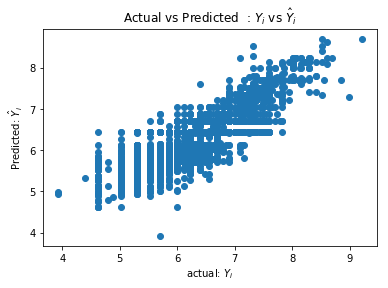

In [192]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=47)
Y_pred = DT.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

# 5.GradientBoostingRegressor

In [193]:
from sklearn.ensemble import GradientBoostingRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
gbr=GradientBoostingRegressor()
gs=GridSearchCV(gbr,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [194]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
Final_r_state=max_r2_score(gbr,x,y)

The maximum r2 score reached is 0.7441821528210677 at random state 61


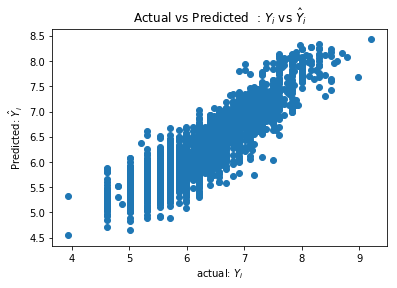

In [195]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=61)
Y_pred = gbr.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [196]:
print('mean cross_val_score using R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
RMSE=rmse(gbr,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.7290148708325261
std deviation of cross_val_score using  R2 as parameter 0.009686937511728886
mean cross_val_score using RMSE as a scoring parameter -0.13910083818803634


# 6.AdaBoostRegressor

In [197]:
from sklearn.ensemble import AdaBoostRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DT,knr]}
ad=AdaBoostRegressor()
gs=GridSearchCV(ad,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.01,
 'n_estimators': 1000}

In [198]:
ad=AdaBoostRegressor(learning_rate=0.01,n_estimators=1000,base_estimator=DT)
Final_r_state=max_r2_score(ad,x,y)

The maximum r2 score reached is 0.7072833791419213 at random state 76


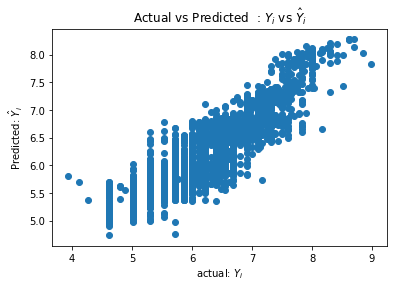

In [199]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=76)
Y_pred = ad.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show() 

In [200]:
print('mean cross_val_score using R2 as parameter',cross_val_score(ad,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score using  R2 as parameter',cross_val_score(ad,x,y,cv=5,scoring='r2').std())
RMSE=rmse(ad,x,y,Final_r_state)
List_rmse=list_rmse(RMSE)

mean cross_val_score using R2 as parameter 0.6938741198236476
std deviation of cross_val_score using  R2 as parameter 0.012204193735729974
mean cross_val_score using RMSE as a scoring parameter -0.15866520547208673


# 7.XGBRegressor

In [201]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
parameter={'learning_rate':[0.001,0.01,0.1,1],'gamma':[10,100,500,1000]}
xgb = XGBRegressor(silent=True)
gs=GridSearchCV(xgb,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 10, 'learning_rate': 1}

In [202]:
xgb=XGBRegressor(learning_rate=1,gamma=10,silent=True)
Final_r_state=max_r2_score(xgb,x,y)

The maximum r2 score reached is 0.6619943881615932 at random state 82


In [ ]:
# train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=82)
Y_pred = xgb.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show() 

# 8.RandomForestRegressor

In [204]:
from sklearn.ensemble import RandomForestRegressor
parameter={'max_depth':range(1,30),'n_estimators':[10,100,500,1000]}
RF = RandomForestRegressor()
gs=GridSearchCV(RF,parameter,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 15, 'n_estimators': 1000}

In [205]:
RF = RandomForestRegressor(max_depth=15,n_estimators=1000)
Final_r_state=max_r2_score(RF,x,y)

The maximum r2 score reached is 0.7111629395488837 at random state 76


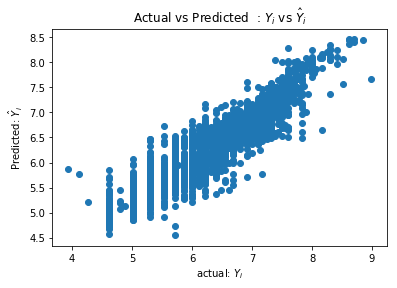

In [206]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=76)
Y_pred = RF.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("actual: $Y_i$")
plt.ylabel("Predicted: $\hat{Y}_i$")
plt.title("Actual vs Predicted  : $Y_i$ vs $\hat{Y}_i$")
plt.show() 

After performing several regressor models on this data set and after analysing the performance matrix for all the models , it is concluded that GradientBoostingRegressor is giving the best results which are as follows :

The maximum r2 score reached is 0.7441821528210677 at random state 61

Therefore GradientBoostingRegressor is selected as our final model

# Final Model --GradientBoostingRegressor

In [207]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=61)
gbr.fit(train_x,train_y)
pred = gbr.predict(test_x)
r2_scr=r2_score(test_y,pred)

In [208]:
from sklearn.metrics import mean_squared_error
print('RMSE',np.sqrt(mean_squared_error(test_y,pred)))
print('r2_score',r2_score(test_y,pred))
print('mean cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('std deviation of cross_val_score',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

RMSE 0.37056234114382197
r2_score 0.7441413255302125
mean cross_val_score 0.7290559544749354
std deviation of cross_val_score 0.009643366468379936


In [212]:
#Predict on testing data:
test_X=data_test.drop(['COST'],axis=1)
test_X.fillna(0,inplace=True)
test_X["Res_Predicted_Cost"] =  gbr.predict(test_X)

In [215]:
test_X["Res_Predicted_Cost"]

0       7.050356
1       5.958375
2       6.948150
3       6.443993
4       5.792228
          ...   
4226    7.141926
4227    6.701259
4228    6.628424
4229    6.001815
4230    6.971813
Name: Res_Predicted_Cost, Length: 4230, dtype: float64

In [216]:
from sklearn.externals import joblib
joblib.dump(gbr,"gbr_restuarant_cost.pkl")

['gbr_restuarant_cost.pkl']

# Conclusion :

The project was about predicting average cost of the meal in the restaurant based on features like :-

FEATURES: TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

As the class of this dataset is real valued feature , this becomes the problem of regression .

In this project we have dropped the non essential columns, we have performed label encoding on the categorical features and also we have found the outliers and degree of the dependency of class on to the input features .

In the last section of the work , we have used several regressor models for the prediction and based on the performance matrix we have selected GradientBoostingRegressor as our Final model as r2 score for this is maximum .

At last we have saved the final model using joblib.